Question 1. Using ‘oblique.py’, generate a Gaussian beam which propagates in 
x-direction. Measure the beam radius and peak value of field strength at 
several different positions along x (including the focal point). Compare the 
measured radius with the envelope formula. Also check the power 
conservation along the propagation. 


import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emitEMwave as ant
import emitEMwave_update as antu

Set variables

In [2]:
xmax=20
ymax=10
dx=0.02
dy=0.02
dt=0.01
f=2
D=10
smax=2000

In [3]:
a=dt/dx;  b=dt/dy
w=2.0*np.pi*f

In [4]:
cntr=0.5*ymax
upper=int(0.5*(ymax+D)/dy)
lower=int(0.5*(ymax-D)/dy)

In [5]:
x=np.arange(0,xmax+dx,dx)
y=np.arange(0,ymax+dy,dy)
Nh = int(xmax/dx/2)

In [6]:
X,Y=np.meshgrid(x,y)
Ex=0*X; Ey=0*X; Ez=0*X
Bx=0*X; By=0*X; Bz=0*X

In [7]:
I_sum = 0*X # commulated intensity for each step

##  Simulation of Gaussian wave

In [8]:
s=0
while s <= smax:
	#Ey[:,0]= np.exp(-(y-cntr)**2/(0.2*ymax)**2)*np.sin(w*s*dt) # emission 
	#Ey[lower:upper,0]= np.sin(w*s*dt) # hole 
	antu.emitEMwave(s*dt,Ey[:,0],(dx,dy),'ovwrt','p',0,0,f,0,0,10,(1.0,),1000,1)

	Bx[:-1,:-1] +=  -b*(Ez[1:,:-1]-Ez[:-1,:-1])
	By[1:-1,:-1] +=  a*(Ez[1:-1,1:]-Ez[1:-1,:-1])
	Bz[:-1,:-1]+= -a*(Ey[:-1,1:]-Ey[:-1,:-1]) + b*(Ex[1:,:-1]-Ex[:-1,:-1])
	Ex[1:-1,:Nh] +=  b*(Bz[1:-1,:Nh]-Bz[:-2,:Nh])
	Ex[1:-1,Nh:-1] +=  b*(Bz[1:-1,Nh:-1]-Bz[:-2,Nh:-1])
	Ey[:-1,1:Nh] += -a*(Bz[:-1,1:Nh]-Bz[:-1,:Nh-1])
	Ey[:-1,Nh:-1] += -a*(Bz[:-1,Nh:-1]-Bz[:-1,Nh-1:-2])
	Ez[1:-1,1:-1]+=  a*(By[1:-1,1:-1]-By[1:-1,:-2]) - b*(Bx[1:-1,1:-1]-Bx[:-2,1:-1])
    
	I_sum += Ey ** 2
#	Ez[1:-1,1:-1]+=  a*(By[1:-1,1:-1]-By[1:-1,:-2]) - b*(Bx[1:-1,1:-1]-Bx[:-2,1:-1])
	s+=1


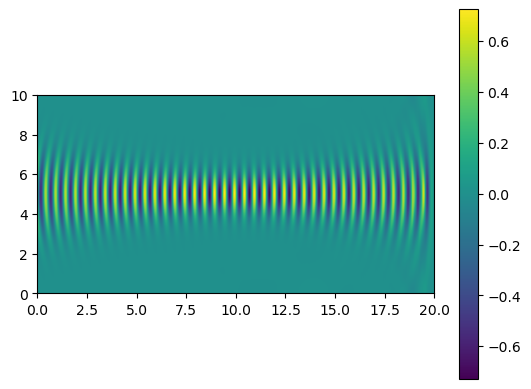

In [9]:
extn = (0,xmax,0,ymax)
plt.scatter(int(cntr/dy),100)
cs=plt.imshow(Ey,extent=extn); plt.colorbar(cs); plt.show()

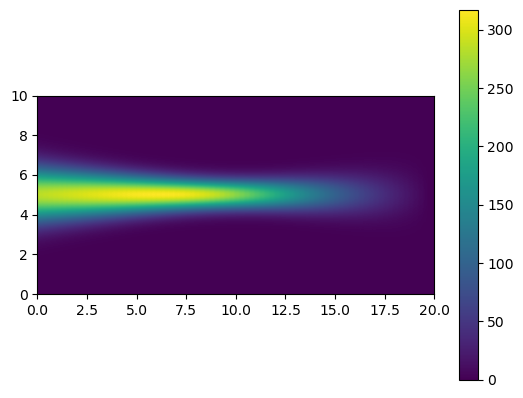

In [10]:
extn = (0,xmax,0,ymax)
cs=plt.imshow(I_sum,extent=extn); plt.colorbar(cs); plt.show()

## Measure radius of beam and compare it to theoretical value

Measured radius : where the intensity of wave becomes ${1}\over{e^{2}}$ of center of gaussian.
Since wave is basically sine-wave, we cannot take good measure when using square of E. (There's so many point which phase is not maximum or minimum, whose absolute value is amplitude. And intensity of wave is proportional to square of ampllitude.)
Therefore, we will use commulated intensity for each iteration because this value can cancel the effect above.

In [11]:
r = 0 *x
for i in range(len(x)) :
    for j in range(int(len(y)/2)) :
        if abs(I_sum[j+int(cntr/dy),i]/np.max(I_sum[:,i])) <= np.e**(-2) :
            r[i] = j
            break
            
r = r*dy

C:\Users\LG\AppData\Local\Temp\ipykernel_2736\774945182.py:4: RuntimeWarning: invalid value encountered in double_scalars
  if abs(I_sum[j+int(cntr/dy),i]/np.max(I_sum[:,i])) <= np.e**(-2) :


theoretical value
$ r = r_{0} \sqrt{1+z\lambda/\pi r_{0}^{2}}$ 

In [12]:
wavelength = 1/f
#mesh of wwave lenfth : wavelength/dx
w0 = r[int(10/dx)] # radius of focus 

In [13]:
cal_r =w0*np.sqrt(1+(((x-10)/(np.pi*f*w0**2))**2))
#plt.plot(x,dx*r[0]*np.sqrt(1+(((x-10)*wl/(np.pi*r[0]**2))**2))

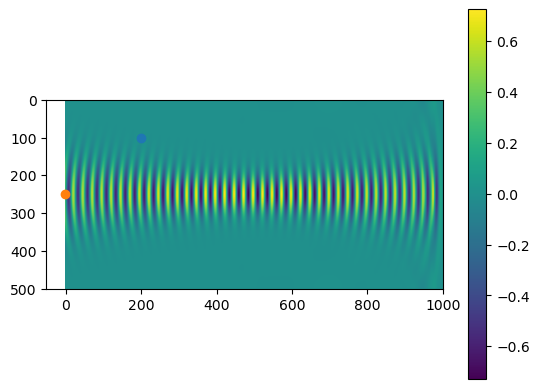

In [14]:
cs=plt.imshow(Ey); plt.colorbar(cs);plt.scatter(200,100)
plt.scatter(-1,int(cntr/dy)); plt.show()

Compare theoretical and measure value

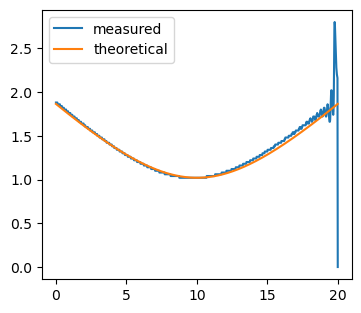

In [15]:
plt.figure(figsize = (4,3.5))
plt.plot(x,r,label='measured')
plt.plot(x,cal_r,label = 'theoretical')
plt.legend()

plt.show()


Compare for fixed x

500


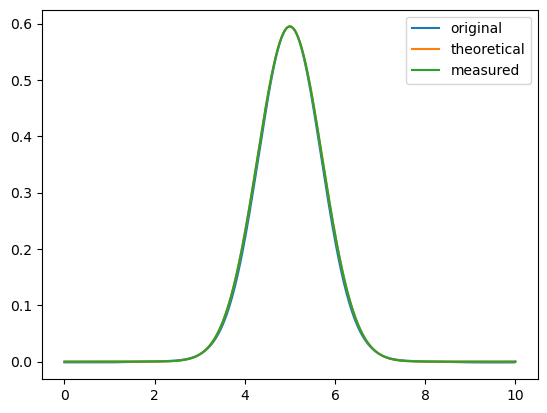

In [16]:
xc = 10
n = int(xc/dx)
print(n)
plt.plot(y,Ey[:,n],label = 'original')
plt.plot(y,max(Ey[:,n])*np.exp(-(y-cntr)**2/cal_r[n]**2),label='theoretical')
plt.plot(y,max(Ey[:,n])*np.exp(-(y-cntr)**2/r[n]**2),label = 'measured')
plt.legend()
plt.show()

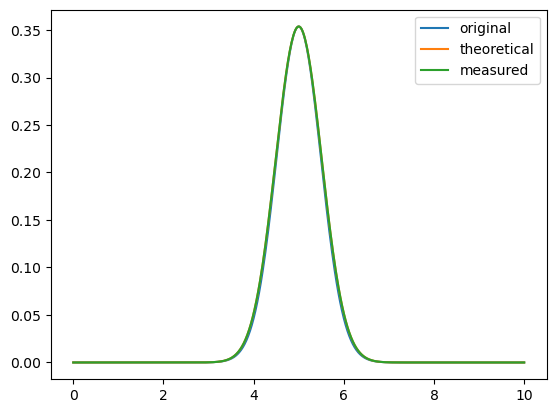

In [17]:
# intensity
plt.plot(y,Ey[:,n]**2,label = 'original')
plt.plot(y,(max(Ey[:,n])*np.exp(-(y-cntr)**2/cal_r[n]**2))**2,label='theoretical')
plt.plot(y,(max(Ey[:,n])*np.exp(-(y-cntr)**2/r[n]**2))**2,label = 'measured')
plt.legend()
plt.show()

350


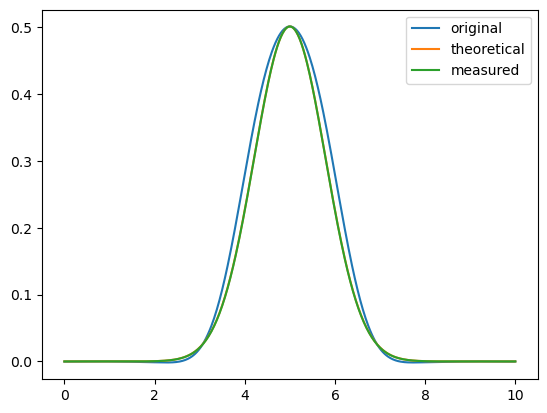

In [18]:
xc = 7
n = int(xc/dx)
print(n)
plt.plot(y,Ey[:,n],label = 'original')
plt.plot(y,max(Ey[:,n])*np.exp(-(y-cntr)**2/cal_r[n]**2),label='theoretical')
plt.plot(y,max(Ey[:,n])*np.exp(-(y-cntr)**2/r[n]**2),label = 'measured')
plt.legend()
plt.show()

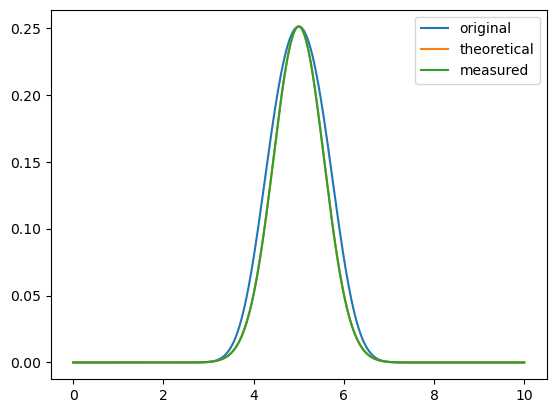

In [19]:
#intensity
plt.plot(y,Ey[:,n]**2,label = 'original')
plt.plot(y,(max(Ey[:,n])*np.exp(-(y-cntr)**2/cal_r[n]**2))**2,label='theoretical')
plt.plot(y,(max(Ey[:,n])*np.exp(-(y-cntr)**2/r[n]**2))**2,label = 'measured')
plt.legend()
plt.show()

## Peak value

In [20]:
cntr_index = int(cntr/dy)
cntr_index

250

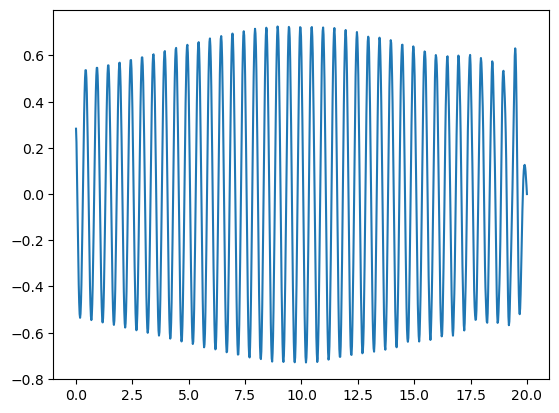

In [21]:
plt.plot(x,Ey[cntr_index, :]); plt.show()

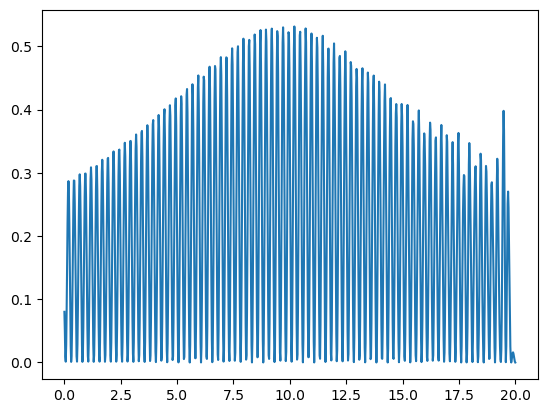

In [22]:
plt.plot(x,Ey[cntr_index, :]**2); plt.show()

## Power conservation

In general case(3D), $P=\int IdA$.
But this case is 2 dimensional, so formula should be converted to $P = \int I(y)dy$
Since this is gaussian beam, $ I = I_{0}e^{-{{2y^2}\over{r^2}}}$

$P = \int I(y)dy = \int  I_{0}e^{-{{2y^2}\over{r^2}}}dy = I_{0}r\sqrt{{\pi}\over{2}}$


In [23]:
wavelength = 1/f
#mesh of wwave lenfth : wavelength/dx
w_index = int(wavelength/dx)
w_index

25

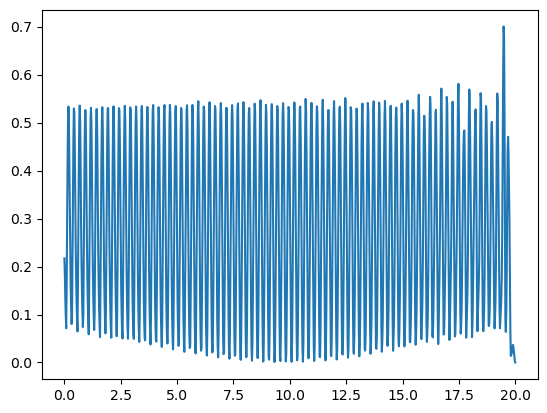

In [24]:
P = r*np.max(Ey**2,axis =0)
    
plt.plot(x,P)
plt.show()

Result : For pick value,(wave has maximum-that is, amplitude) it has almost same values. 

Because this process is time homogeneous, the purse would have the power which is equal to next purse. Thus, above graph is equivalent to $r E_{y}^{2}$ for time. And pick value reflects power. Then, we can conclude that power is conservative for time by uniformness on pick values.

In [40]:
I = 0*X
for i in range(len(x)) :
    t = s - (1/a)*i # time from starting oscillating to end for x-index i
    if t < 0 :t =1
    I[: , i] = I_sum[:,i]/t
    
P = np.max(I,axis=0)*r

In [ ]:
I = 0*X
for i in range(len(x)) :
    t = s - (1/a)*i # time 
    if t < 0 :t =1
    I[: , i] = I_sum[:,i]/t
    
P = np.max(I,axis=0)*r

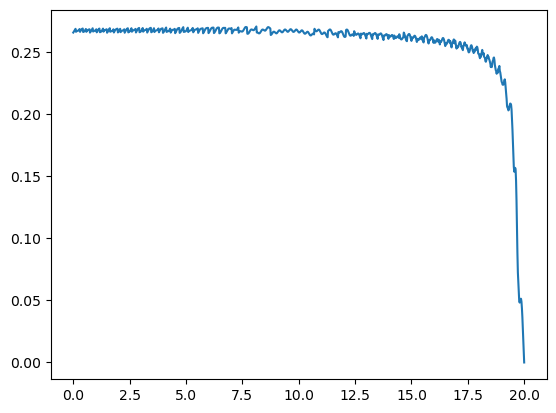

In [42]:
plt.plot(x,P)
#plt.plot(x,np.sum(I,axis=0))
plt.show()

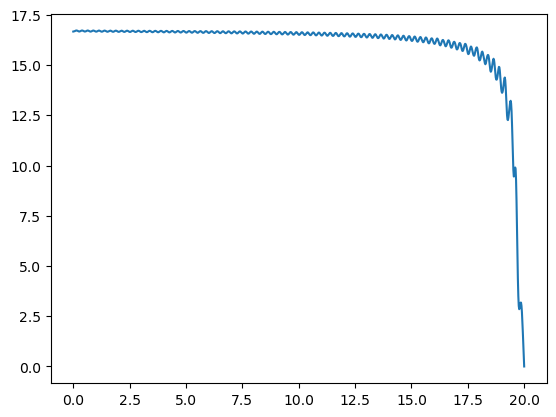

In [43]:
plt.plot(x,np.sum(I,axis=0))
plt.show()